In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import Counter
import sys

global training_data
global bots
global nonbots
training_data=pd.read_csv('training_data.csv')
bots = training_data[training_data.bot==1]
nonbots = training_data[training_data.bot==0]


#Print python version
print('Python', sys.version)
print(training_data.columns)

Python 3.7.0 (default, Jun 28 2018, 08:04:48) [MSC v.1912 64 bit (AMD64)]
Index(['id', 'id_str', 'screen_name', 'location', 'description', 'url',
       'followers_count', 'friends_count', 'listed_count', 'created_at',
       'favourites_count', 'verified', 'statuses_count', 'lang', 'status',
       'default_profile', 'default_profile_image', 'has_extended_profile',
       'name', 'bot'],
      dtype='object')


### Training data balance

Showing the balance of the two classes, having an even balance will provide better training for the classifer

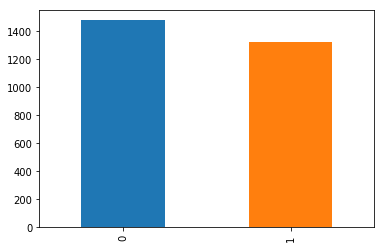

In [2]:
# Compare bot count vs non bot count
def get_bots_balance(df):
    df['bot'].value_counts().plot(kind='bar')


get_bots_balance(training_data)

We observe that the data is balanced, that we have a similar amount of each class

### Discover missing data

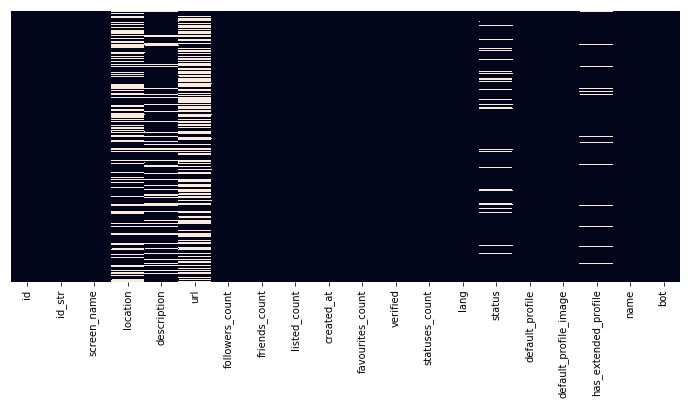

In [3]:
# Plots a heatmap showing with features contain NaN/Null values
def show_missing_data(df):
    #show all missing/NaN data in the data frame
    plt.figure(figsize=(12,5))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False)
    plt.show()

show_missing_data(training_data)

This heatmap show us which fields have NaN/empty fields, we can see that URL and Location are not often completed by the user. This could be analysed further to see if that is a trend between bots and nonbots, if not these fields would be dropped from the input for the classifier.

In [4]:
bots.isna().sum()

id                         0
id_str                     0
screen_name                0
location                 672
description              189
url                      792
followers_count            0
friends_count              0
listed_count               0
created_at                 0
favourites_count           0
verified                   0
statuses_count             0
lang                       0
status                   155
default_profile            0
default_profile_image      0
has_extended_profile      50
name                       0
bot                        0
dtype: int64

In [5]:
nonbots.isna().sum()

id                         0
id_str                     0
screen_name                0
location                 348
description              214
url                      550
followers_count            0
friends_count              0
listed_count               0
created_at                 0
favourites_count           0
verified                   0
statuses_count             0
lang                       0
status                   134
default_profile            0
default_profile_image      0
has_extended_profile      49
name                       0
bot                        0
dtype: int64

### Spearman Correlation

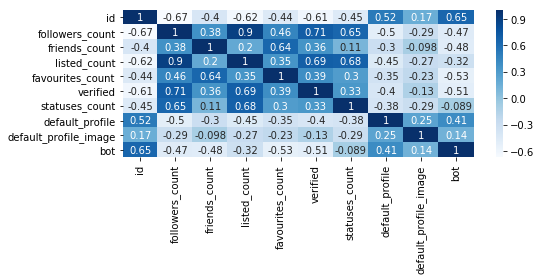

In [6]:
plt.figure(figsize=(8,4))
sns.heatmap(training_data.corr(method='spearman'),cmap="Blues", annot=True)
plt.tight_layout()
plt.show()

# Defualt Profile Image

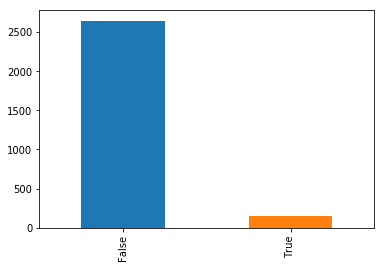

In [34]:
def get_profileImage_balance(df):
    df['default_profile_image'].value_counts().plot(kind='bar')
    
get_profileImage_balance(training_data)

Not enough variance to use.

# Followers Vs Friends

In [8]:
botsFollowersM = np.mean(bots.followers_count)
nonbotsFollowersM = np.mean(nonbots.followers_count)

print('botsFollowerM =', botsFollowersM, 'nonbotsFollowerM =', nonbotsFollowersM)

botsFollowerM = 13458.77365632097 nonbotsFollowerM = 1876165.454607046


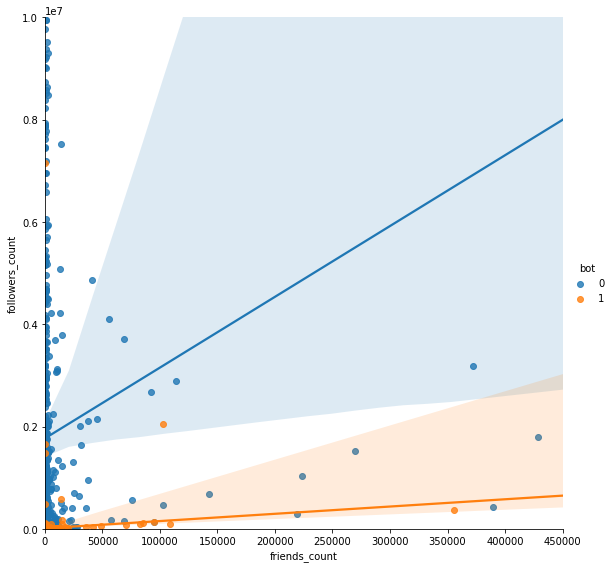

In [9]:
# Plots graph with followers_count vs friends_count (following) splitting bots and nonbots
def followersVsFriends(df):
    #produces a scatter plot showing Followers vs friends
    sns.lmplot(x="friends_count", y="followers_count", hue="bot", truncate=True, height=8, data=df)
    plt.ylim(0,10000000)
    plt.xlim(0,450000)
    plt.plot()
    
followersVsFriends(training_data)

Non bots have a more even relationship between followers and friends. This could be because bots will tend to mass follow other account to try and gain a higher following themselves. Bots that do not follow a high amount of users and have a high following may tend to be bots providing a service. 

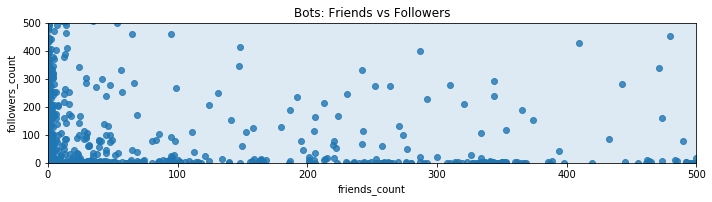

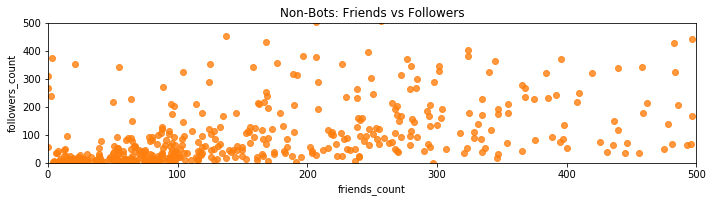

In [10]:
# Plots graph with followers_count vs friends_count (following)
def followersVsFriendsZoom(df, title, col):
    #produces a scatter plot showing Followers vs friends
    plt.figure(figsize=(10,5))
    plt.subplot(2,1,1)
    plt.title(title)
    sns.regplot(df.friends_count, df.followers_count, color=col, label='Bots')
    plt.xlim(0, 500)
    plt.ylim(0, 500)
    plt.tight_layout()
    
followersVsFriendsZoom(training_data[training_data.bot==1], 'Bots: Friends vs Followers', '#1f77b4')

followersVsFriendsZoom(training_data[training_data.bot==0], 'Non-Bots: Friends vs Followers', '#ff7f0e')

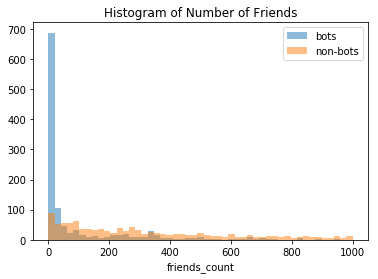

In [11]:
def plotHistFollowerVFriends(df, title):    
    x = training_data[training_data.bot==1].friends_count
    y = training_data[training_data.bot==0].friends_count

    bins = np.linspace(0, 1000, 50)

    plt.hist(x, bins, alpha=0.5, label='bots')
    plt.hist(y, bins, alpha=0.5, label='non-bots')
    plt.legend(loc='upper right')
    plt.xlabel('friends_count', fontsize=10)
    plt.title(title)
    plt.show()
    
plotHistFollowerVFriends(training_data, 'Histogram of Number of Friends')

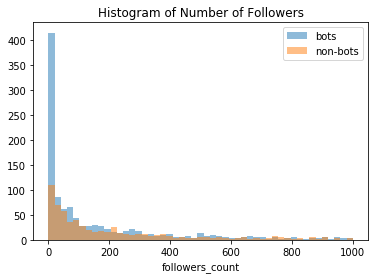

In [12]:
def plotHistFollowerVFriends(df, title):    
    x = training_data[training_data.bot==1].followers_count
    y = training_data[training_data.bot==0].followers_count

    bins = np.linspace(0, 1000, 50)

    plt.hist(x, bins, alpha=0.5, label='bots')
    plt.hist(y, bins, alpha=0.5, label='non-bots')
    plt.legend(loc='upper right')
    plt.xlabel('followers_count', fontsize=10)
    plt.title(title)
    plt.show()
    
plotHistFollowerVFriends(training_data, 'Histogram of Number of Followers')

# Status Count

In [13]:
print('Total Bots: ',bots.id.count())
print('Total Bots with Status: ',bots[bots.status.isnull() == False].id.count())

print('Total Non Bots: ',nonbots.id.count())
print('Total Non Bots with Status: ',nonbots[nonbots.status.isnull() == False].id.count())

Total Bots:  1321
Total Bots with Status:  1166
Total Non Bots:  1476
Total Non Bots with Status:  1342


# Listed

Text(0.5,1,'Histogram of Listed Count')

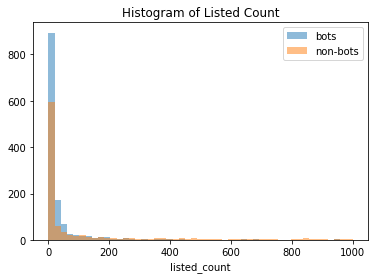

In [14]:
x = training_data[training_data.bot==1].listed_count
y = training_data[training_data.bot==0].listed_count

bins = np.linspace(0, 1000, 50)

plt.hist(x, bins, alpha=0.5, label='bots')
plt.hist(y, bins, alpha=0.5, label='non-bots')
plt.legend(loc='upper right')
plt.xlabel('listed_count', fontsize=10)
plt.title('Histogram of Listed Count')

(0, 20000)

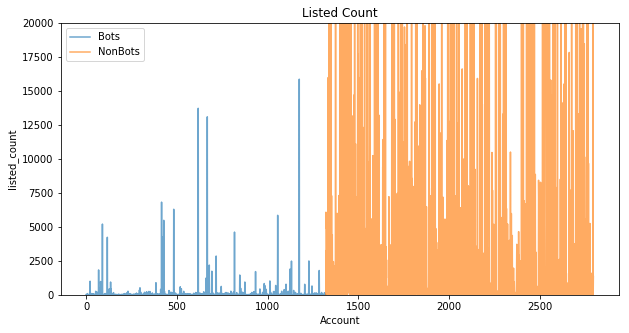

In [15]:
plt.figure(figsize=(10,5))
plt.plot(bots.listed_count, color='#1f77b4', alpha=0.65, label='Bots')
plt.plot(nonbots.listed_count, color='#ff7f0e', alpha=0.65 , label='NonBots')
plt.legend(loc='upper left')
plt.title('Listed Count')
plt.xlabel('Account', fontsize=10)
plt.ylabel('listed_count', fontsize=10)
plt.ylim(0,20000)

# Import Libraries

In [16]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install --upgrade pip
!{sys.executable} -m pip install vaderSentiment
!{sys.executable} -m pip install TextBlob
!{sys.executable} -m pip install PyHamcrest
!{sys.executable} -m pip install nltk

Requirement already up-to-date: pip in d:\0_myfiles\0_libraries\documents\anaconda3\lib\site-packages (19.0.3)


# Description and Name Analysis

In [17]:
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import nltk

nltk.download('stopwords')
english_stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tom\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Format and stem description

In [18]:
# remove NaNs (floats)
def getTextDesc(desc):
    try:
        if isinstance(desc, float):
            return ''
        return desc
    except Exception as error:
        return ''
    
bots['description'] = bots.apply(lambda row: getTextDesc(row['description']), axis=1)
nonbots['description'] = nonbots.apply(lambda row: getTextDesc(row['description']), axis=1)

bots['screen_name'] = bots.apply(lambda row: getTextDesc(row['screen_name']), axis=1)
nonbots['screen_name'] = nonbots.apply(lambda row: getTextDesc(row['screen_name']), axis=1)

D:\0_MyFiles\0_Libraries\Documents\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
D:\0_MyFiles\0_Libraries\Documents\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
D:\0_MyFiles\0_Libraries\Documents\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

### Stem decription

In [19]:
def stemLine(sentence):
    stemmer = nltk.PorterStemmer()
    translator=sentence.translate(str.maketrans("","", string.punctuation))
    translator = translator.lower()
    tokens = word_tokenize(translator)
    final = [stemmer.stem(tagged_word) for tagged_word in tokens]
    return " ".join(final)

bots['descriptionStemmed'] = bots['description'].apply(lambda row: stemLine(row))
nonbots['descriptionStemmed'] = nonbots['description'].apply(lambda row: stemLine(row))

D:\0_MyFiles\0_Libraries\Documents\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
D:\0_MyFiles\0_Libraries\Documents\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [35]:
# Counts frequency in of words in a list of strings, returns a DataFrame with Index, Word, Count
def countWordFreq(df):
    counts = Counter()
    for sentence in df:
        counts.update(word.strip('.,?!"\'').lower() for word in sentence.split())
    counts = pd.DataFrame.from_dict(counts, orient='index').reset_index()
    counts = counts.rename(columns={'index':'word', 0:'counts'})
    return counts

# Removes NaN values from a list of strings
def removeNaN(df):
    cleaned = [x for x in df if str(x) != 'nan']
    return cleaned

# Plots graph of y=Word and x=Count
def wordCountGraph(df, height=15):
    sns.set(style="whitegrid")
    # Initialize the matplotlib figure
    f, ax = plt.subplots(figsize=(10, height))
    sns.set_color_codes("pastel")
    sns.barplot(x="counts", y="word", data=df,
                label="Total", color="b")
    
def getUniqueWords(df1, df2, limit1, limit2): #Returns unique in df1
    # Only include values in df 1 w/ larger count than limit1
    df1 = df1[df1.counts > limit1].reset_index(drop=True)
    df1 = df1['word']

    # Only include values in df 2 w/ larger count than limit2
    df2 = df2[df2.counts > limit2].reset_index(drop=True)
    df2 = df2['word']
    
    # Find common words in df1 that DO NOT appear in df2 also removing stop words
    return list(set(df1) - set(df2) - set(english_stopwords))

# Make list of popular words in decription and screen name
bot_descr = countWordFreq(removeNaN(bots.description))
nonbot_descr = countWordFreq(removeNaN(nonbots.description))

bot_name = countWordFreq(removeNaN(bots.name))
nonbot_name = countWordFreq(removeNaN(nonbots.name))

bot_sname = countWordFreq(removeNaN(bots.screen_name))
nonbot_sname = countWordFreq(removeNaN(nonbots.screen_name))

bot_StemDescr  = countWordFreq(removeNaN(bots.descriptionStemmed))
nonbot_StemDescr  = countWordFreq(removeNaN(nonbots.descriptionStemmed))

#Description
print('\n Description')
print(getUniqueWords(bot_descr, nonbot_descr, 30, 50))
print(getUniqueWords(nonbot_descr, bot_descr, 40, 50))

#Description
print('\n Stemmed Description')
print(getUniqueWords(bot_StemDescr, nonbot_StemDescr, 40, 50))
print(getUniqueWords(nonbot_StemDescr, bot_StemDescr, 40, 50))

#NAME
print('\n Name')
print(getUniqueWords(bot_name, nonbot_name, 40, 50))
print(getUniqueWords(nonbot_name, bot_name, 30, 50))

#Screen NAME
print('\n Screen Name')
print(getUniqueWords(bot_sname, nonbot_sname, 30, 50))
print(getUniqueWords(nonbot_sname, bot_sname, 40, 50))


 Description
['papers', 'tweets', 'tweet', 'random', '//', 'people', 'every', 'created', '@tinysubversions', '#botally', "i'm", 'made', 'follow', 'bot', 'day', 'feed']
['', '|', 'official', 'de', '-', 'love']

 Stemmed Description
['tweet', 'random', 'time', 'paper', 'im', 'word', 'made', 'follow', 'botal', 'gener', 'bot', 'pubm', 'everi', 'thi', 'day', 'creat']
['live', 'de', 'love', 'offici']

 Name
['bot']
[]

 Screen Name
[]
[]


# Sentiment Analysis

### Rip text from status

In [21]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re
analyzer = SentimentIntensityAnalyzer()

def getTextStatus(status):
    try:
        if isinstance(status, float):
            return ''
        if re.search('u\'text\': u\'', status): #\'text\': u
            s = re.search('\'text\': ', status)
            status = status[s.end()+2:]
            e = re.search('\',', status)
            status = status[:e.start()]
            if '{' in status:
                return 'catch1'
        if re.search('\'text\': u', status): #\'text\': u
            s = re.search('\'text\': ', status)
            status = status[s.end()+1:]
            e = re.search('\',', status)
            status = status[:e.start()]
            if '{' in status:
                return 'catch2'
        if re.search('\'text\': ', status): #\'text\':
            s = re.search('\'text\': ', status)
            status = status[s.end()+1:]
            e = re.search('\',', status)
            status = status[:e.start()]
            if '{' in status:
                return 'catch3'
        if re.search('"text": "', status): #'text': '
            s = re.search('"text": "', status)
            status = status[s.end()+1:]
            e = re.search('",\r', status)
            status = status[:e.start()]
            if '{' in status:
                return 'catch4'    
        if re.search('None', status): #'None'
            return 'catch5'
        if re.search('"', status):
            s = re.search('"', status)
            status = status[s.end():]
            e = re.search('"', status)
            status = status[:e.start()]
            return 'catch6'
        return status
    except Exception as error:
        return ''
    
training_data['statusStemmed'] = training_data.apply(lambda row: getTextStatus(row['status']), axis=1)

#Stem status text
ps = nltk.stem.PorterStemmer()
training_data['statusStemmed'] = training_data['statusStemmed'].apply(lambda row: stemLine(row))

# Add new column with compound sentiment score
f = lambda x: analyzer.polarity_scores(x['statusStemmed'])['compound'] #GET COMPOUND FROM STATUS
training_data['senti'] = training_data.apply(f, axis=1)

### Status Text Sentiment Distribution

Text(0.5,1,'Histogram of Status Sentiment')

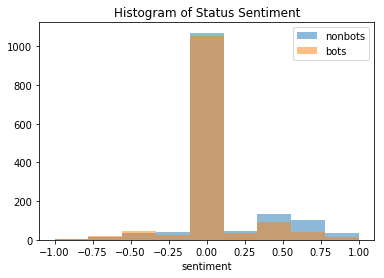

In [40]:
x = training_data[training_data.bot==1].senti
y = training_data[training_data.bot==0].senti

bins = np.linspace(-1, 1, 10)

plt.hist(y, bins, alpha=0.5, label='nonbots')
plt.hist(x, bins, alpha=0.5, label='bots')
plt.legend(loc='upper right')
plt.xlabel('sentiment', fontsize=10)
plt.title('Histogram of Status Sentiment')

In [43]:
# Show all status text
#i = 0
#for x in training_data.status:
#    print(i, ':',training_data.iloc[i].statusStemmed)
#    print(training_data.iloc[i].senti)
#    i +=1

#### Description Sentiment

In [44]:
def getTextDesc(desc):
    try:
        if isinstance(desc, float):
            return ''
        return desc
    except Exception as error:
        return ''
    
training_data['description'] = training_data.apply(lambda row: getTextDesc(row['description']), axis=1)
training_data['descriptionStemmed'] = training_data['description'].apply(lambda row: stemLine(row))

analyzer = SentimentIntensityAnalyzer()

f = lambda x: analyzer.polarity_scores(x['descriptionStemmed'])['compound'] #GET COMPOUND FROM STATUS
training_data['senti_Desc'] = training_data.apply(f, axis=1)

### Description Text Sentiment Distribution

Text(0.5,1,'Histogram of Status Sentiment')

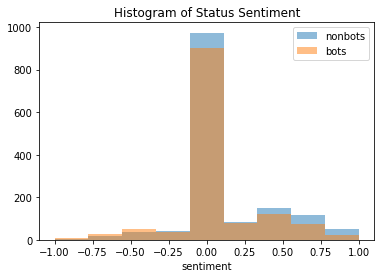

In [45]:
x = training_data[training_data.bot==1].senti_Desc
y = training_data[training_data.bot==0].senti_Desc

bins = np.linspace(-1, 1, 10)

plt.hist(y, bins, alpha=0.5, label='nonbots')
plt.hist(x, bins, alpha=0.5, label='bots')
plt.legend(loc='upper right')
plt.xlabel('sentiment', fontsize=10)
plt.title('Histogram of Status Sentiment')

# TFID Vectorize

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

vec = TfidfVectorizer()

training_data.description.fillna(' ')
training_data.screen_name.fillna(' ')


matrix = vec.fit_transform(training_data['description'].values.astype('U'))
names = vec.get_feature_names()

doc = 0
index = matrix[doc,:].nonzero()[1]
scores = zip(index, [matrix[doc, x] for x in index])

for w, s in [(names[i], s) for (i, s) in scores]:
    print(w, s)


rare 0.27443750045659415
and 0.10960524447374477
strong 0.2816327274358401
pokžmon 0.5714757105922466
in 0.13540076252941302
houston 0.31559256554884935
tx 0.30773974957618344
see 0.23431413121537387
more 0.21390765052772848
at 0.16270613455339997
https 0.15182673701115132
co 0.13372663205411545
dnwudbfrkt 0.3550583457966497


In [32]:
from sklearn.feature_extraction.text import CountVectorizer

countVec = CountVectorizer()
botsCV = countVec.fit_transform(training_data[training_data.bot==1].description)
botsCV.shape

countVec = CountVectorizer()
nbotsCV = countVec.fit_transform(training_data[training_data.bot==0].description)
nbotsCV.shape

(1476, 5738)